In [18]:
!pip install nba_api

import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats

#Call the data from the player data .csv and truncate to only include 1989-90 seasons onward
closed_file = 'NBA PROJECTS.csv'
players = pd.read_csv(closed_file)
players = players.loc[(players['Tm'] != 'TOT')& (players['Year'] >= 1990)]

In [19]:
record_file = 'NBA Season Records.csv'
name_file = 'NBA Abbreviations.csv'
records = pd.read_csv(record_file)
names = pd.read_csv(name_file)

#Clean the data in the season column to go from str(2016-17) format to float(2017) format
ssns = []
for year in records['Season']:
    yr = int(year.split('-')[1])
    if ((10 <= yr) & (yr < 20)):
        ssns.append(float('20' + str(yr)))
    elif((0 <= yr) & (yr < 10)):
        ssns.append(float('200' + str(yr)))
    else:
        ssns.append(float('19' + str(yr)))
seasons = pd.Series(ssns)
records['Season'] = seasons

#Truncate the data to only represent seasons from 1989-90 onward (removing 2017-18 as it was not in the other dataframe)
records = records.loc[(records['Season'] >= 1990) & (records['Season'] <= 2017)]

#Remove the * after the team name denoting a playoff presence
records['Team'] = records['Team'].str.replace('*', '')

#Change the names of the teams on the record dataset to the abbreviations on the abbreviation dataset
records['Team'] = records['Team'].map(names.set_index('Team')['Abbreviation'])

#Special condition for "Charlotte Hornets." The name was not used contiguously, so additional conditions were needed
records.loc[(records['Team'].isnull() == True) & 
            (records['Season'] >= 2015), 'Team'] = records.loc[(records['Team'].isnull() == True) & 
                                                               (records['Season'] >= 2015), 'Team'].replace({np.nan:'CHA'})
records.loc[(records['Team'].isnull() == True) & 
            (records['Season'] < 2015), 'Team'] = records.loc[(records['Team'].isnull() == True) & 
                                                               (records['Season'] < 2015), 'Team'].replace({np.nan:'NOP'})
records = records.rename(columns = {'Team':'Tm', 'Season':'Year'})

#Denote whether the team made the playoffs that season
records['Made Playoffs'] = records['Playoffs'].notna()

In [20]:
#Rename some of the team abbreviations to capture recent franchise movement/rename.
players = players.replace({'Tm':{'WSB':'WAS', 'VAN': 'MEM', 'NJN': 'BRK', 'SEA': 'OKC', 
                         'CHH':'NOP', 'NOH': 'NOP', 'NOK': 'NOP', 'CHO':'CHA' }})

In [21]:
#Merge the season results data with the player data. Season data is duplicated for each player
nba = pd.merge(players, records, on = ['Year', 'Tm'], how = 'left')

#Write to csv for easier visualization
nba.to_csv("test_output/merge_results.csv", index=False, header=True)

In [43]:
nba

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS,Made Playoffs
0,9547,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,...,104.1,5.8,105.8,-2.3,114.3,6.2,NaN,M. Guokas (18-64),O. Smith (3.3),False
1,9548,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,...,105.4,7.1,108.0,-0.1,106.7,-1.4,Lost W. Conf. 1st Rnd.,D. Moe (43-39),F. Lever (8.8),True
2,9549,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,...,94.4,-3.9,109.9,1.8,103.5,-4.6,Won Finals,C. Daly (59-23),B. Laimbeer (10.1),True
3,9550,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,...,96.7,-1.6,104.8,-3.3,110.0,1.9,NaN,J. Reynolds (7-21) D. Motta (16-38),R. McCray (7.9),False
4,9551,1990.0,Mark Alarie,PF,26.0,WAS,82.0,10.0,1893.0,14.1,...,99.4,1.1,107.5,-0.6,109.7,1.6,NaN,W. Unseld (31-51),D. Walker (6.3),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13772,24686,2017.0,Cody Zeller,PF,24.0,CHA,62.0,58.0,1725.0,16.7,...,95.7,-0.7,108.8,0.0,108.6,-0.2,NaN,S. Clifford (36-46),K. Walker (8.1),False
13773,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5),True
13774,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,96.8,0.4,103.7,-5.1,110.5,1.7,NaN,F. Vogel (29-53),E. Payton (4.4),False
13775,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,95.3,-1.1,107.4,-1.4,107.0,-1.8,Lost E. Conf. 1st Rnd.,F. Hoiberg (41-41),J. Butler (13.8),True


In [29]:
nba.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Lg', 'W', 'L', 'W/L%',
       'Finish', 'SRS', 'Pace', 'Rel_Pace', 'ORtg', 'Rel_ORtg', 'DRtg',
       'Rel_DRtg', 'Playoffs', 'Coaches', 'Top WS', 'Made Playoffs'],
      dtype='object')

,3P%
Year,
1990.0,0.217191
1991.0,0.211539
1992.0,0.215209
1993.0,0.220591
1994.0,0.235655
1995.0,0.269659
1996.0,0.281043
1997.0,0.285920
1998.0,0.249085


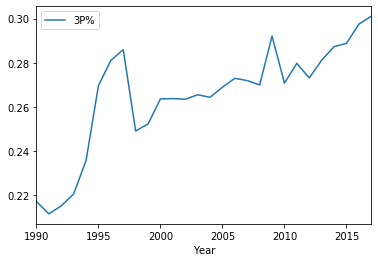

In [85]:
years = nba.groupby(['Year']).mean()
shooting = years[['3P%']]

shooting.plot(kind = 'line')

shooting

In [73]:
teams = nba.groupby(['Tm']).mean()

teamshooting = teams[['TS%', '3PA', '3P%', 'eFG%', 'WS/48']]

teamshooting = teamshooting.sort_values(['3PA'], ascending = False)
teamshooting

,TS%,3PA,3P%,eFG%,WS/48
Tm,,,,,
HOU,0.514046,94.860370,0.266066,0.477217,0.078663
LAL,0.507698,87.318182,0.271719,0.468295,0.078930
IND,0.513224,83.721839,0.265474,0.471228,0.083552
PHO,0.515472,82.343158,0.287491,0.478081,0.072324
ORL,0.499448,82.106610,0.263915,0.461870,0.067194
POR,0.506182,81.926991,0.270613,0.469255,0.081312
OKC,0.515467,81.663755,0.268080,0.478076,0.081548
NYK,0.505006,81.471092,0.286791,0.467157,0.073218
GSW,0.508252,80.433735,0.278297,0.469059,0.065998


In [50]:
nba.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Lg', 'W', 'L', 'W/L%',
       'Finish', 'SRS', 'Pace', 'Rel_Pace', 'ORtg', 'Rel_ORtg', 'DRtg',
       'Rel_DRtg', 'Playoffs', 'Coaches', 'Top WS', 'Made Playoffs'],
      dtype='object')

(0.8241914625349471, 2.1747037866385124e-08)


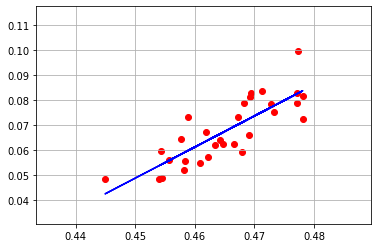

In [78]:
x = teams['eFG%']
y = teams['WS/48']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x, y)
plt.scatter(x,y, facecolors = 'red')
plt.plot(x, line, color = "blue")
plt.grid(b = True)
print(cor)


In [87]:
C  = nba.loc[nba['Pos']== 'C']
SF = nba.loc[nba['Pos']== 'SF']
SG = nba.loc[nba['Pos']== 'SG']
PG = nba.loc[nba['Pos']== 'PG']
PF = nba.loc[nba['Pos']== 'PF']

Cyear = C.groupby(['Year']).count()
PFyear = PF.groupby(['Year']).count()
SFyear = SF.groupby(['Year']).count()
SGyear = SG.groupby(['Year']).count()
PGyear = PG.groupby(['Year']).count()



In [97]:
shooting

,3P%
Year,
1990.0,0.217191
1991.0,0.211539
1992.0,0.215209
1993.0,0.220591
1994.0,0.235655
1995.0,0.269659
1996.0,0.281043
1997.0,0.285920
1998.0,0.249085


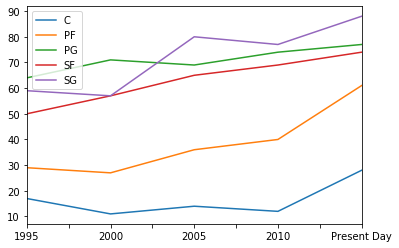

In [186]:
a = nba.loc[(nba["Year"] == 2017) & (nba['3P%'] >= 0.301048)]
b = nba.loc[(nba["Year"] == 2016) & (nba['3P%'] >= 0.297472)]
c = nba.loc[(nba["Year"] == 2015) & (nba['3P%'] >= 0.288785)]
d = nba.loc[(nba["Year"] == 2014) & (nba['3P%'] >= 0.287286)]
e = nba.loc[(nba["Year"] == 2013) & (nba['3P%'] >= 0.281127)]
f = nba.loc[(nba["Year"] == 2012) & (nba['3P%'] >= 0.273095)]
g = nba.loc[(nba["Year"] == 2011) & (nba['3P%'] >= 0.279706)]
h = nba.loc[(nba["Year"] == 2010) & (nba['3P%'] >= 0.270778)]
i = nba.loc[(nba["Year"] == 2009) & (nba['3P%'] >= 0.292035)]
j = nba.loc[(nba["Year"] == 2008) & (nba['3P%'] >= 0.269962)]
k = nba.loc[(nba["Year"] == 2007) & (nba['3P%'] >= 0.271919)]
l = nba.loc[(nba["Year"] == 2006) & (nba['3P%'] >= 0.272938)]
m = nba.loc[(nba["Year"] == 2005) & (nba['3P%'] >= 0.268903)]
n = nba.loc[(nba["Year"] == 2004) & (nba['3P%'] >= 0.264361)]
o = nba.loc[(nba["Year"] == 2003) & (nba['3P%'] >= 0.265482)]
p = nba.loc[(nba["Year"] == 2002) & (nba['3P%'] >= 0.263487)]
q = nba.loc[(nba["Year"] == 2001) & (nba['3P%'] >= 0.263739)]
r = nba.loc[(nba["Year"] == 2000) & (nba['3P%'] >= 0.263629)]
s = nba.loc[(nba["Year"] == 1999) & (nba['3P%'] >= 0.252288)]
t = nba.loc[(nba["Year"] == 1998) & (nba['3P%'] >= 0.249085)]
u = nba.loc[(nba["Year"] == 1997) & (nba['3P%'] >= 0.285920)]
v = nba.loc[(nba["Year"] == 1996) & (nba['3P%'] >= 0.281043)]
w = nba.loc[(nba["Year"] == 1995) & (nba['3P%'] >= 0.269659)]
x = nba.loc[(nba["Year"] == 1994) & (nba['3P%'] >= 0.235655)]
y = nba.loc[(nba["Year"] == 1993) & (nba['3P%'] >= 0.220591)]
z = nba.loc[(nba["Year"] == 1992) & (nba['3P%'] >= 0.215209)]
aa = nba.loc[(nba["Year"] == 1991) & (nba['3P%'] >= 0.211539)]
bb = nba.loc[(nba["Year"] == 1990) & (nba['3P%'] >= 0.217191)]


warriors = a['Pos'].value_counts()
heat = h['Pos'].value_counts()
spurs = m['Pos'].value_counts()
lakers = r['Pos'].value_counts()
bulls = w['Pos'].value_counts()


combined = {'Present Day' : warriors, '2010' : heat, '2005' : spurs, '2000' : lakers, '1995' : bulls}

combined_df = pd.DataFrame(combined)

tcombined = combined_df.transpose()

tcombined = tcombined[::-1]

tcombined.plot(kind = 'line')

#year = combined_df.keys()
#position = 



In [132]:
averages = []
for i in shooting:
    yearly_average = shooting['3P%']
    averages.append(yearly_average)


In [146]:
sharpshooter[['Player', 'Year', '3P%', '3P']]

,Player,Year,3P%,3P
0,Mark Acres,1990.0,0.750,3.0
1,Michael Adams,1990.0,0.366,158.0
2,Mark Aguirre,1990.0,0.333,31.0
3,Danny Ainge,1990.0,0.374,108.0
5,Steve Alford,1990.0,0.318,7.0
...,...,...,...,...
412,Randy Wittman,1990.0,0.500,1.0
415,Mike Woodson,1990.0,0.293,12.0
418,James Worthy*,1990.0,0.306,15.0
419,Danny Young,1990.0,0.271,16.0
